In [33]:
import requests
from bs4 import BeautifulSoup
import bs4
import pandas as pd
import numpy as np
from IPython.display import Image
pd.options.display.max_rows = 5000 #(设定能显示的行数)

### Go to rightmove.co.uk, search rental properties in Maidstone, and copy paste to replace the 'url' below

In [23]:
link = 'https://www.rightmove.co.uk/property-for-sale/find.html?searchType=SALE&locationIdentifier=REGION%5E70387&insId=1&radius=3.0&minPrice=&maxPrice=&minBedrooms=&maxBedrooms=3&displayPropertyType=flats&maxDaysSinceAdded=&_includeSSTC=on&sortByPriceDescending=&primaryDisplayPropertyType=&secondaryDisplayPropertyType=&oldDisplayPropertyType=&oldPrimaryDisplayPropertyType=&newHome=&auction=false'

acton_park_3beds_link = 'https://www.rightmove.co.uk/property-for-sale/find.html?locationIdentifier=REGION%5E70387&maxBedrooms=3&minBedrooms=3&radius=0.25&propertyTypes=flat&primaryDisplayPropertyType=flats&includeSSTC=false&mustHave=&dontShow=&furnishTypes=&keywords='

In [24]:
bdrooms = []
addresses = []
rent = []

for start in range(0,480,24):
    url = acton_park_3beds_link.format(start)
    r = requests.get(url)
    soup = BeautifulSoup(r.text, "html.parser")
    
    for num in soup.find_all('h2', class_= 'propertyCard-title'):
        bdrooms.append(num.text.strip())
        
    for add in soup.find_all('address', class_="propertyCard-address"):
        for meta in add:
            for loc in meta:
                if type(loc) is bs4.element.NavigableString:
                    addresses.append(loc)
                    
    for pc in soup.find_all('div', 'propertyCard-priceValue'):
        rent.append(pc.string)

In [25]:
print(len(bdrooms))
print(bdrooms[:5])
print(len(addresses))
print(addresses[:5])
print(len(rent))
print(rent[:5])

500
['3 bedroom flat for sale', '3 bedroom flat for sale', '3 bedroom apartment for sale', '3 bedroom flat for sale', '3 bedroom flat for sale']
480
['Kings Court, King Street, Ealing', 'Hereford Road, London', 'Emanuel Avenue, London', 'Emanuel Avenue, London', 'Eastbourne Avenue, London, W3']
500
['£765,000        ', '£725,000        ', '£695,000        ', '£695,000        ', '£695,000        ']


In [26]:
acton_park_3beds = pd.DataFrame({'bdrooms':pd.Series(bdrooms), 'address':pd.Series(addresses), 'price':pd.Series(rent)})
acton_park_3beds.tail()

,bdrooms,address,price
495,3 bedroom flat for sale,NaN,"£549,000"
496,3 bedroom flat for sale,NaN,"£525,000"
497,3 bedroom apartment for sale,NaN,"£525,000"
498,3 bedroom flat for sale,NaN,"£519,950"
499,Property,NaN,


In [36]:
acton_park_3beds

,bdrooms,address,price
0,3 bedroom flat for sale,"Kings Court, King Street, Ealing","£765,000"
1,3 bedroom flat for sale,"Hereford Road, London","£725,000"
2,3 bedroom apartment for sale,"Emanuel Avenue, London","£695,000"
3,3 bedroom flat for sale,"Emanuel Avenue, London","£695,000"
4,3 bedroom flat for sale,"Eastbourne Avenue, London, W3","£695,000"
5,3 bedroom apartment for sale,"Acton Gardens, W3","£675,000"
6,3 bedroom flat for sale,"Spencer Rd, Acton Central W3 6DW","£675,000"
7,3 bedroom flat for sale,"Cumberland Park, Poet's Corner, London, W3","£675,000"
8,3 bedroom house for sale,"Acton Lane, London","£650,000"
9,3 bedroom apartment for sale,"Acton Lane, London, W3","£650,000"


In [35]:
acton_3beds = acton_park_3beds[acton_park_3beds['bdrooms'].str.contains('3')]

In [37]:
acton_3beds

,bdrooms,address,price
0,3 bedroom flat for sale,"Kings Court, King Street, Ealing","£765,000"
1,3 bedroom flat for sale,"Hereford Road, London","£725,000"
2,3 bedroom apartment for sale,"Emanuel Avenue, London","£695,000"
3,3 bedroom flat for sale,"Emanuel Avenue, London","£695,000"
4,3 bedroom flat for sale,"Eastbourne Avenue, London, W3","£695,000"
5,3 bedroom apartment for sale,"Acton Gardens, W3","£675,000"
6,3 bedroom flat for sale,"Spencer Rd, Acton Central W3 6DW","£675,000"
7,3 bedroom flat for sale,"Cumberland Park, Poet's Corner, London, W3","£675,000"
8,3 bedroom house for sale,"Acton Lane, London","£650,000"
9,3 bedroom apartment for sale,"Acton Lane, London, W3","£650,000"


In [38]:
acton_3beds = acton_3beds.dropna()
acton_3beds.tail()

,bdrooms,address,price
475,3 bedroom flat for sale,"Perryn Road, London","£765,000"
476,3 bedroom flat for sale,"Perryn Road, Acton, W3","£725,000"
477,3 bedroom apartment for sale,"Rosebank Way, Acton","£695,000"
478,3 bedroom flat for sale,"Creffield Road, London, W3","£695,000"
479,3 bedroom flat for sale,"Avenue Gardens, Acton","£695,000"


In [39]:
acton_3beds['price'] = [int(''.join(filter(str.isdigit, i))) for i in acton_3beds['price']]
acton_3beds.tail()

,bdrooms,address,price
475,3 bedroom flat for sale,"Perryn Road, London",765000
476,3 bedroom flat for sale,"Perryn Road, Acton, W3",725000
477,3 bedroom apartment for sale,"Rosebank Way, Acton",695000
478,3 bedroom flat for sale,"Creffield Road, London, W3",695000
479,3 bedroom flat for sale,"Avenue Gardens, Acton",695000


In [40]:
acton_3beds.describe()

,price
count,461.000000
mean,618674.945770
std,70052.150343
min,519950.000000
25%,550000.000000
50%,599950.000000
75%,675000.000000
max,765000.000000


In [ ]:
# df[df['ids'].str.contains("ball")]

In [41]:
acton_3beds = acton_3beds.drop_duplicates()

In [42]:
acton_3beds.head()

,bdrooms,address,price
0,3 bedroom flat for sale,"Kings Court, King Street, Ealing",765000
1,3 bedroom flat for sale,"Hereford Road, London",725000
2,3 bedroom apartment for sale,"Emanuel Avenue, London",695000
3,3 bedroom flat for sale,"Emanuel Avenue, London",695000
4,3 bedroom flat for sale,"Eastbourne Avenue, London, W3",695000


In [43]:
acton_3beds.address.unique()

array(['Kings Court, King Street, Ealing', 'Hereford Road, London',
       'Emanuel Avenue, London', 'Eastbourne Avenue, London, W3',
       'Acton Gardens, W3', 'Spencer Rd, Acton Central W3 6DW',
       "Cumberland Park, Poet's Corner, London, W3", 'Acton Lane, London',
       'Acton Lane, London, W3', 'Highlands Avenue, Acton, W3',
       'Eastfields Road, Acton', 'Highlands Avenue, Acton, London, W3',
       'Grafton Road, Acton', 'Cumberland Road, Acton',
       'Petersfield Road, Acton', 'Petersfield Road, Acton, London, W3',
       'Myrtle Road, London, W3', 'Myrtle Road, Acton',
       'Perryn Road, London', 'Perryn Road, Acton, W3',
       'Rosebank Way, Acton', 'Creffield Road, London, W3',
       'Avenue Gardens, Acton'], dtype=object)

In [44]:
acton_3beds.price.describe()

count       406.000000
mean     613537.684729
std       70005.960212
min      519950.000000
25%      549950.000000
50%      595000.000000
75%      675000.000000
max      765000.000000
Name: price, dtype: float64

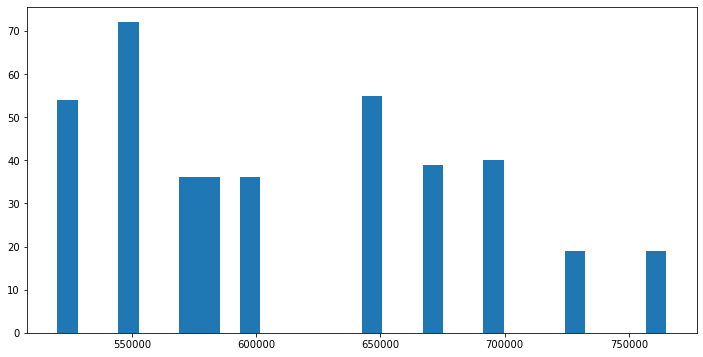

In [47]:
acton_3beds.price.hist(figsize=(12,6),grid=False, bins=30);